In [1]:
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import HistGradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from test_utils import accuracy_dp_check_noise_first

#### TODO: documentation (as in InPrivate Digging notebook)

## 1) Iris dataset

In [2]:
X_iris, y_iris = load_iris(return_X_y=True)

### 1.1) Accuracy w.r.t. epsilon

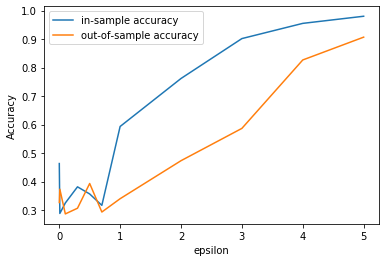

    epsilon  delta  in-sample accuracy  out-of-sample accuracy
0     0.001      0            0.463333                0.326667
1     0.010      0            0.288333                0.373333
2     0.100      0            0.325000                0.286667
3     0.300      0            0.381667                0.306667
4     0.500      0            0.356667                0.393333
5     0.700      0            0.316667                0.293333
6     1.000      0            0.593333                0.340000
7     2.000      0            0.761667                0.473333
8     3.000      0            0.901667                0.586667
9     4.000      0            0.955000                0.826667
10    5.000      0            0.980000                0.906667
11  100.000      0            0.995000                0.940000
12      NaN      0            1.000000                0.933333


In [3]:
accuracy_dp_check_noise_first(HistGradientBoostingClassifier, X_iris, y_iris, max_bins=40)

### 1.2) Accuracy w.r.t. delta

/home/mjazbec/Documents/sklearn_local_fork/scikit-learn/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:705: RuntimeWarning: divide by zero encountered in log
  b = diameter / (epsilon-np.log(1-delta))
/home/mjazbec/Documents/sklearn_local_fork/scikit-learn/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:705: RuntimeWarning: divide by zero encountered in log
  b = diameter / (epsilon-np.log(1-delta))
/home/mjazbec/Documents/sklearn_local_fork/scikit-learn/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:705: RuntimeWarning: divide by zero encountered in log
  b = diameter / (epsilon-np.log(1-delta))


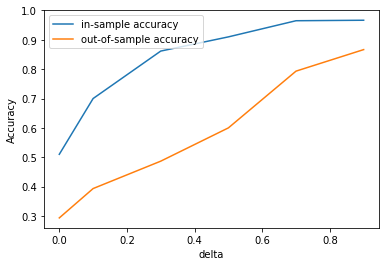

   epsilon  delta  in-sample accuracy  out-of-sample accuracy
0      0.5    0.0            0.510000                0.293333
1      0.5    0.1            0.700000                0.393333
2      0.5    0.3            0.861667                0.486667
3      0.5    0.5            0.910000                0.600000
4      0.5    0.7            0.965000                0.793333
5      0.5    0.9            0.966667                0.866667
6      0.5    1.0            1.000000                0.933333
7      0.5    NaN            1.000000                0.953333


In [3]:
accuracy_dp_check_noise_first(HistGradientBoostingClassifier, epsilons=[0.5],
                              deltas=[0,0.1,0.3,0.5,0.7,0.9,1, None], X=X_iris, 
                              y=y_iris, max_bins=40, to_plot="delta")

### 1.3) Effect of adding noise to feature distribution

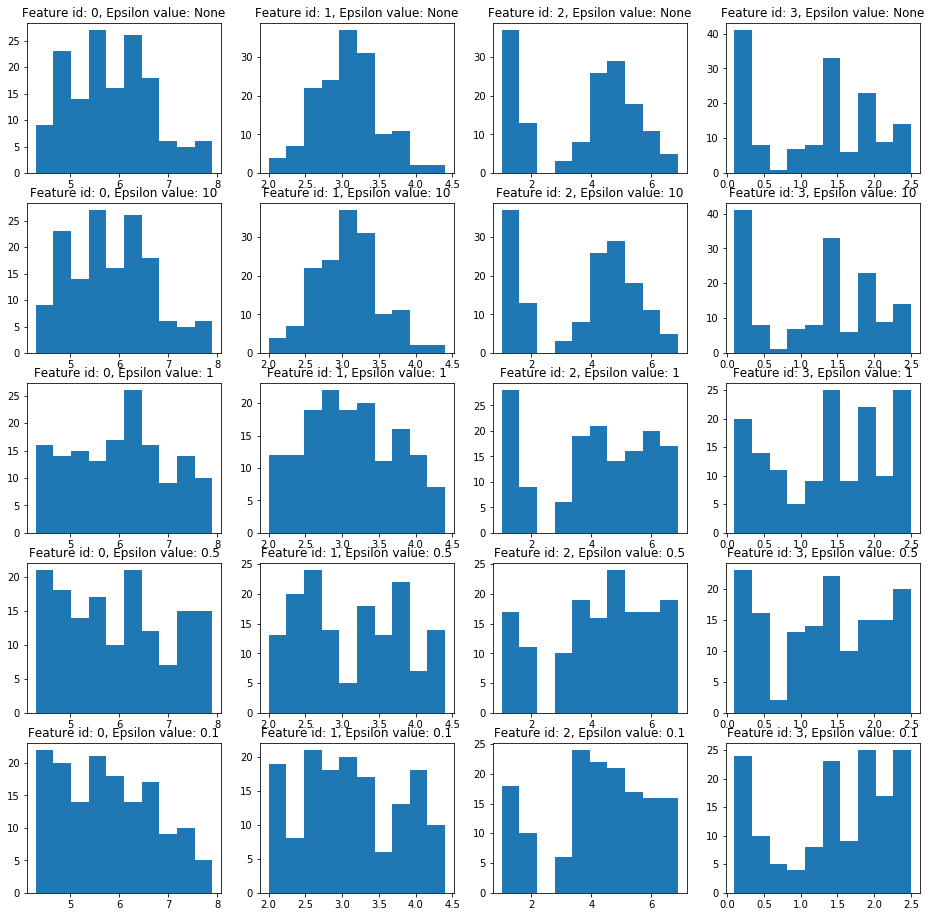

In [40]:
n = X_iris.shape[1]
# EPSILONS = [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 2, 3, 4, 5, 100]
EPSILONS = list(reversed([0.1, 0.5, 1, 10, None]))
DELTA = 0
# fig, axes = plt.subplots(len(EPSILONS), n, figsize = (16,30))
fig=plt.figure(figsize=(16,16))
subplot_id = 1
model = HistGradientBoostingClassifier()
for i, epsilon in enumerate(EPSILONS):
    if epsilon is None:
        X_dp = X_iris.copy()
    else:
        X_dp = model._diff_privacy_noise_first(X_iris, epsilon, DELTA)
    for j, f_idx in enumerate(range(n)):
        ax=fig.add_subplot(len(EPSILONS), n, subplot_id)
        plt.hist(X_dp[:,f_idx])
        ax.set_title('Feature id: {}, Epsilon value: {}'.format(f_idx, epsilon))
        subplot_id += 1
plt.show()

## 2) Telco dataset

In [4]:
data = pd.read_csv("../../Federated_start/federated-learning-metod/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype('float32')
categorical_cols = list(set(list(data.columns)) - set(['tenure', 'MonthlyCharges', 'TotalCharges', 'customerID']))
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded.TotalCharges = pd.to_numeric(data_encoded['TotalCharges'],errors='coerce')

X_telco, y_telco = data_encoded.loc[:, ~data_encoded.columns.isin(['Churn_Yes', 'customerID'])], data_encoded.Churn_Yes

In [5]:
X_telco.head()

,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,PaperlessBilling_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_Yes,gender_Male,DeviceProtection_No internet service,DeviceProtection_Yes,Dependents_Yes
0,1,29.85,29.850000,0,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,34,56.95,1889.500000,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
2,2,53.85,108.150002,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,0
3,45,42.30,1840.750000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,2,70.70,151.649994,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [6]:
X_telco.shape

(7043, 30)

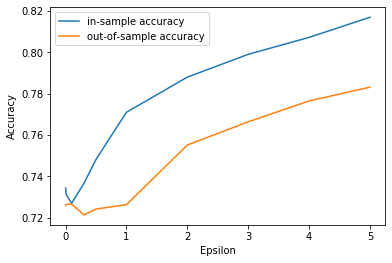

    epsilon  in-sample accuracy  out-of-sample accuracy
0     0.001            0.734382                0.725969
1     0.010            0.731222                0.726536
2     0.100            0.727070                0.726679
3     0.300            0.736653                0.721427
4     0.500            0.748260                0.724265
5     0.700            0.757454                0.725118
6     1.000            0.771050                0.726396
7     2.000            0.788052                0.755222
8     3.000            0.799056                0.766433
9     4.000            0.807255                0.776518
10    5.000            0.816981                0.783188
11  100.000            0.846585                0.793979
12      NaN            0.878141                0.792274


In [8]:
accuracy_dp_check_noise_first(HistGradientBoostingClassifier, X_telco.values, y_telco.values, max_bins=255)